**비지도 학습**
- 지도 학습과 달리 정답 데이터를 제공하지 않고 학습을 수행하는 기법
- 종류
  - 차원 축소
    - 데이터에 포함된 특성 중 유의미한 값을 추출
    - 데이터에 포함된 특성을 대표하는 값을 반환
    - 주로 시각화, 소셜 네트워크 분석, 이미지 분석, RGB 등에 사용
  - 군집 분석
    - 데이터의 유사성을 비교하여 동일한 특성으로 구성된 데이터를 하나의 군집으로 처리
- 유의 사항
  - 학습 결과는 주관적인 판단으로 처리하며, 100% 신뢰할 수 없음
  - 매번 다른 결과가 나올 수 있음 

**군집 분석**
- **KMeans(n_clusters=8, init='k-means++', n_init=10...)**
  - ```python
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=3)
    cluster = km.fit_predict(X)
    ```
  - 가장 많이 사용하는 군집 분석 알고리즘으로, 단순하여 변경에 용이함 
  - n_clusters에 정의된 개수만큼 포인트를 지정하여 군집 분석을 수행 
  - init - 초기 중심점 선택 방법 (k-means++, random)
  - n_init - 초기 중심점 선택 반복 횟수

**최적의 군집 개수 검색**
- 엘로우 기법을 활용
  - 반복문을 돌며 inertia_값을 저장하고,
  분포를 살펴본 후 급격히 낮아지는 포인트를 탐색 

**데이터 전처리 with 군집 분석**
- 머신러닝 모델 학습 결과, 가중치가 할당되지 않거나 굉장히 작은 칼럼들에 대해 새로운 특성을 생성한다. 이때 해당 칼럼들에 대한 최적의 군집 개수를 찾고, 이를 이용하여 모델을 생성하고 예측하여 값을 대체한다. 

**병합 군집 분석**
- 다수개의 소규모 군집을 생성하고 취합하여 하나로 병합
- 인접한 위치의 군집 사이에서 발생
- 원하는 개수의 군집을 생성
- **AgglomerativeClustering(n_clusters=2...)**
  - ```python
    from sklearn.cluster import AgglomerativeClustering
    ac = AgglomerativeClustering(n_clusters=3)
    cluster = ac.fit_predict(X)
    ```
  - n_clusters에 정의된 개수만큼 소규모의 군집들을 계속하여 병합한 후, 정의된 개수에 도달하면 해당 정보를 반환

**DBSCAN(X, min_samples=5, metric='minkowski'...)**
- ```python
    from sklearn.cluster import DBSCAN
    db = DBSCAN()
    cluster = db.fit_predict(X)
    ```
- 데이터 간의 밀도를 이용하여 군집 형성 여부를 결정하는 알고리즘
- n_clusters가 자동으로 결정됨
- min_samples - 한 군집 당 최소 데이터 개수
- metric - 거리 계산 방법 

**데이터 생성**
- **make_blobs(n_samples=100, n_features=2, centers=None...)**
  - ```python
    from sklearn.datasets import make_blobs
    X, y = make_blobs(centers=3)
    ```
  - 등방성 가우시안 정규 분포를 이용해 데이터를 생성 
  - n_samples - 표본 데이터의 수
  - n_features - 독립 변수의 수
  - centers - 군집의 수
  - cluster_std - 군집의 표준 편차
  - shuffle - 데이터 셔플 여부
- **make_moons(n_samples=100, shuffle=True, noise=None...)**
  - ```python
    from sklearn.datasets import make_moons
    X, y = make_moons()
    ```
  - 초승달 모양 군집 두 개 형상을 갖는 데이터를 생성
  - n_samples - 표본 데이터의 수
  - noise - 잡음의 크기 (0인 경우 반원을 이룸)


**스태킹**
- 다수개의 머신러닝 모델이 예측한 값을 학습하여 결과를 반환하는 방법
- 앙상블
  - 다수개의 머신러닝 모델의 예측값을 취합하여 평균 또는 다수결의 원칙을 이용하여 예측하는 모델
  - 사용 이유: 일반화 성능을 극대화하기 위해 (예측 성능의 분산을 감소시킬 수 있음)



## Lecture 01 - 비지도 학습 with KMeans

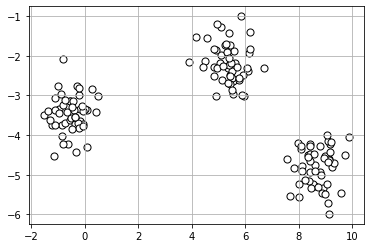

In [34]:
# create data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True)

# show data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.show()

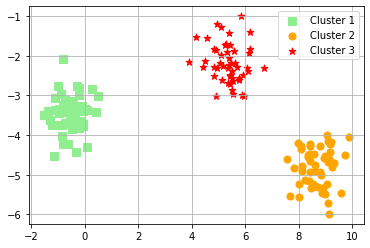

In [35]:
# define KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300)

cluster = km.fit_predict(X)

# show clusters
plt.scatter(X[cluster==0, 0],
            X[cluster==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[cluster==1, 0],
            X[cluster==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='Cluster 2')

plt.scatter(X[cluster==2, 0],
            X[cluster==2, 1],
            s=50,
            c='red',
            marker='*',
            label='Cluster 3')

plt.legend()
plt.grid()
plt.show()

## Lecture 02 - 비지도 학습 with KMeans and 최적의 군집 개수 탐색


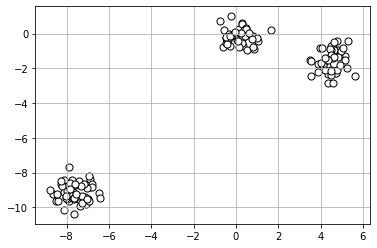

In [36]:
# create data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True)

# show data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.show()

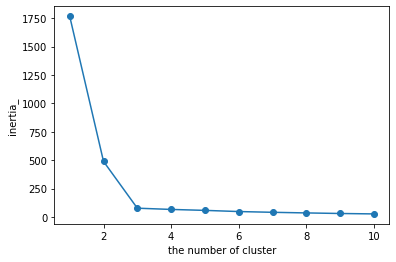

In [4]:
# define inertia_ list
inertia = []

# find best n_clusters
from sklearn.cluster import KMeans

for i in range(1, 11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300)
  km.fit(X)
  inertia.append(km.inertia_)

# show inertia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('the number of cluster')
plt.ylabel('inertia_')
plt.show()

# 급격히 낮아지는 구간 => n_clusters = 2

## Lecture 03 - 비지도 학습 with 데이터 전처리

In [8]:
# import pandas
import pandas as pd

pd.options.display.max_columns = 5
pd.options.display.max_rows = 10\

In [21]:
# load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# set X, y
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(X)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


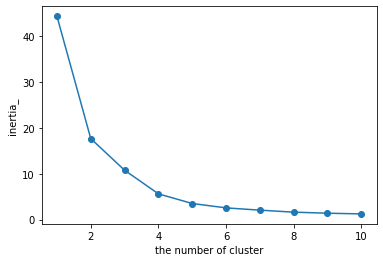

In [22]:
# lower-weight-column
X_part = X[['radius error',
            'compactness error',
            'concavity error']]

# define inertia_ list
inertia = []

# find best n_clusters
from sklearn.cluster import KMeans

for i in range(1, 11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300)
  km.fit(X_part)
  inertia.append(km.inertia_)

# show inertia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('the number of cluster')
plt.ylabel('inertia_')
plt.show()

In [23]:
# 급격히 낮아지는 구간 => n_clusters = 2

# define KMeans with n_clusters = 2
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300)

km.fit(X_part)

# define new column representing lower-weight-column
X['cluster_result'] = km.predict(X_part)

# remove lower-weight-column
del X['radius error']
del X['compactness error']
del X['concavity error']

print(X)

     mean radius  mean texture  ...  worst fractal dimension  cluster_result
0          17.99         10.38  ...                  0.11890               0
1          20.57         17.77  ...                  0.08902               1
2          19.69         21.25  ...                  0.08758               0
3          11.42         20.38  ...                  0.17300               1
4          20.29         14.34  ...                  0.07678               0
..           ...           ...  ...                      ...             ...
564        21.56         22.39  ...                  0.07115               0
565        20.13         28.25  ...                  0.06637               0
566        16.60         28.08  ...                  0.07820               1
567        20.60         29.33  ...                  0.12400               0
568         7.76         24.54  ...                  0.07039               1

[569 rows x 28 columns]


In [24]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=1)

# define MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# define model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0,
                           class_weight='balanced')

model.fit(X_train, y_train)

# evaluate model
print(f'SCORE(TRAIN): {model.score(X_train, y_train)}')
print(f' SCORE(TEST): {model.score(X_test, y_test)}')

# check coef_
print(f'coef_: {model.coef_}')

SCORE(TRAIN): 0.9748743718592965
 SCORE(TEST): 0.9532163742690059
coef_: [[-1.65028486 -1.55343906 -1.62858527 -1.34168401 -0.33693241 -0.39549196
  -1.16237076 -1.8560202  -0.57690953  1.10996849 -0.06285087 -0.76475246
  -0.65215278  0.45613689  0.02764642  0.2208361   0.74035401 -2.09837017
  -2.13506066 -1.92274845 -1.48289553 -1.21170729 -0.85601197 -1.21336678
  -2.34222628 -1.58557205 -0.38120776  1.71707477]]


## Lecture 04 - 비지도 학습 with 병합 군집 

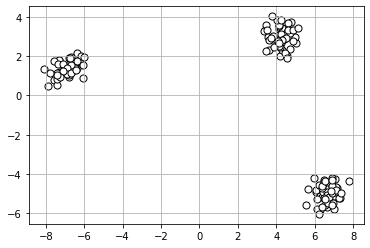

In [37]:
# create data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True)

# show data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.show()

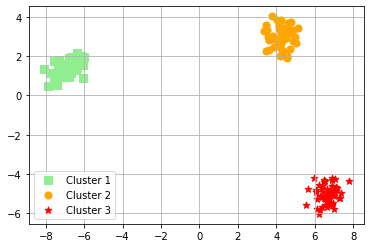

In [38]:
# define AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
cluster = ac.fit_predict(X)

# show clusters
plt.scatter(X[cluster==0, 0],
            X[cluster==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[cluster==1, 0],
            X[cluster==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='Cluster 2')

plt.scatter(X[cluster==2, 0],
            X[cluster==2, 1],
            s=50,
            c='red',
            marker='*',
            label='Cluster 3')

plt.legend()
plt.grid()
plt.show()

## Lecture 05 - 비지도 학습 with DBSCAN

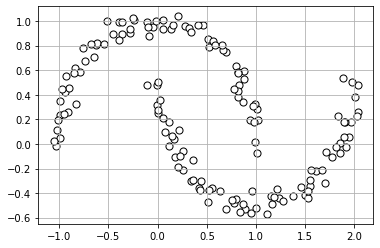

In [39]:
# create data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=150,
                  noise=0.05)

# show data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.show()

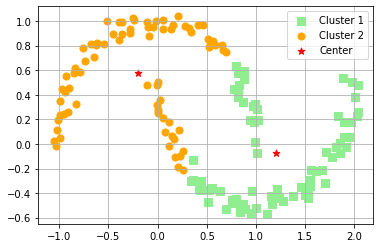

In [40]:
# define KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300)

cluster = km.fit_predict(X)

# show clusters
plt.scatter(X[cluster==0, 0],
            X[cluster==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[cluster==1, 0],
            X[cluster==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=50,
            c='red',
            marker='*',
            label='Center')

plt.legend()
plt.grid()
plt.show()

# => 군집이 제대로 이루어지지 않음 

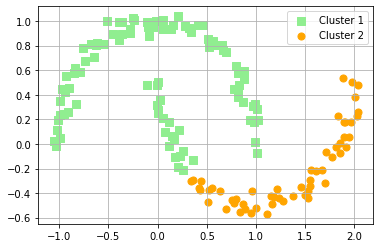

In [41]:
# define AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2)
cluster = ac.fit_predict(X)

# show clusters
plt.scatter(X[cluster==0, 0],
            X[cluster==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[cluster==1, 0],
            X[cluster==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='Cluster 2')

plt.legend()
plt.grid()
plt.show()

# => 군집이 제대로 이루어지지 않음 

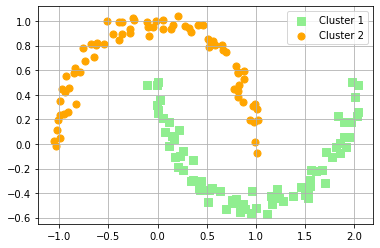

In [42]:
# define DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

cluster = db.fit_predict(X)

# show clusters
plt.scatter(X[cluster==0, 0],
            X[cluster==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[cluster==1, 0],
            X[cluster==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='Cluster 2')

plt.legend()
plt.grid()
plt.show()

## Lecture 06 - 스태킹 

In [45]:
# import pandas
import pandas as pd

pd.options.display.max_columns = 5
pd.options.display.max_rows = 10

# import numpy
import numpy as np

In [47]:
# load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# set X, y
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(X)

# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=1)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [52]:
# define MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# define models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(LogisticRegression().fit(X_train, y_train))
models.append(KNeighborsClassifier().fit(X_train, y_train))
models.append(DecisionTreeClassifier().fit(X_train, y_train))

# evaluate models
scores = [model.score(X_train, y_train) for model in models]

for score in scores:
  print(f'SCORE(TRAIN): {score}')

scores = [model.score(X_test, y_test) for model in models]

for score in scores:
  print(f'SCORE(TEST): {score}')

# define stackking
preds = np.array([model.predict(X_train) for model in models])
preds = preds.T

# define ensemble
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,
                               max_depth=None,
                               max_samples=0.5,
                               max_features=0.3)

model.fit(preds, y_train)

# evaluate ensemble(RandomForestClassifier)
print(f'SCORE(TRAIN): {model.score(preds, y_train)}')

# evaluate each model
preds = np.array([model.predict(X_test) for model in models])
preds = preds.T
print(f'SCORE(TEST): {model.score(preds, y_test)}')


SCORE(TRAIN): 0.9698492462311558
SCORE(TRAIN): 0.9824120603015075
SCORE(TRAIN): 1.0
SCORE(TEST): 0.9532163742690059
SCORE(TEST): 0.9590643274853801
SCORE(TEST): 0.9473684210526315
SCORE(TRAIN): 1.0
SCORE(TEST): 0.9532163742690059
